In [1]:
import cv2
import numpy as np
import sys
sys.path.append("../../utils")
from Gaussian_Smooth_Kernel import create_smooth_gaussian_filter
from Convolution import Convolution
import matplotlib.pyplot as plt


In [2]:
# Reading the image
image = cv2.imread("../../../data/Lena.jpg",cv2.IMREAD_COLOR)
# Split the image
blue,green,red = cv2.split(image)
# print(image)

sigma_value = input("Enter the sigma value for Gaussian filter: ")
if sigma_value:
    sigma_value = float(sigma_value)
else:
    print("Invalid input. Please enter a numeric value.")
    sigma_value = None

if sigma_value is not None:
  kernel = create_smooth_gaussian_filter(kernel_size=5,sigma_value = sigma_value)
  kernel_height,kernel_width = kernel.shape
    
  # finding the center of the kernel
  center_x = kernel_height // 2
  center_y  = kernel_width // 2
  
  convolved_image_blue = Convolution(image=blue,kernel=kernel,anchor_row=center_x,anchor_col=center_y)
  convolved_image_red = Convolution(image=red,kernel=kernel,anchor_row=center_x,anchor_col=center_y)
  convolved_image_green = Convolution(image=green,kernel=kernel,anchor_row=center_x,anchor_col=center_y)
  
  convolved_image = cv2.merge([convolved_image_blue, convolved_image_green, convolved_image_red])
  
  
  # Created a 3d tewmp image
  temp_blue= np.zeros_like(image)
  temp_green = np.zeros_like(image)
  temp_red = np.zeros_like(image)
  temp_blue[:,:,0] = 255
  temp_blue[:,:,1] = 255 - convolved_image_blue
  temp_blue[:,:,2] = 255 - convolved_image_blue
  temp_red[:,:,0] = 255 - convolved_image_red 
  temp_red[:,:,1] = 255 - convolved_image_red
  temp_red[:,:,2] = 255 
  temp_green[:,:,2] = 255 - convolved_image_green
  temp_green[:,:,1] = 255 
  temp_green[:,:,0] = 255 - convolved_image_green 
  
  
  
  # convolved_image_red = 255 - convolved_image_red  //  zero = np.zeroslike(convolved_image_blue)
  # convolved_image_green = 255 - convolved_image_green
  
  
  height, width = convolved_image_blue.shape
  zeros = np.zeros((height, width), dtype=np.uint8)  # Zero array for empty channels
  blue_channel_colored = cv2.merge([convolved_image_blue, zeros, zeros])  # Blue channel (B, 0, 0)
  green_channel_colored = cv2.merge([zeros, convolved_image_green, zeros])  # Green channel (0, G, 0)
  red_channel_colored = cv2.merge([zeros, zeros, convolved_image_red])  # Red channel (0, 0, R)
    
 
    
  # Display each convolved channel as colored images
  cv2.imshow("Convolved Blue Channel", blue_channel_colored)
  cv2.imshow("Convolved Green Channel", green_channel_colored)
  cv2.imshow("Convolved Red Channel", red_channel_colored)
    
  #   # Display the merged convolved color image
  cv2.imshow("Convolved Color Image", convolved_image)
  cv2.waitKey(0)
  cv2.destroyAllWindows()


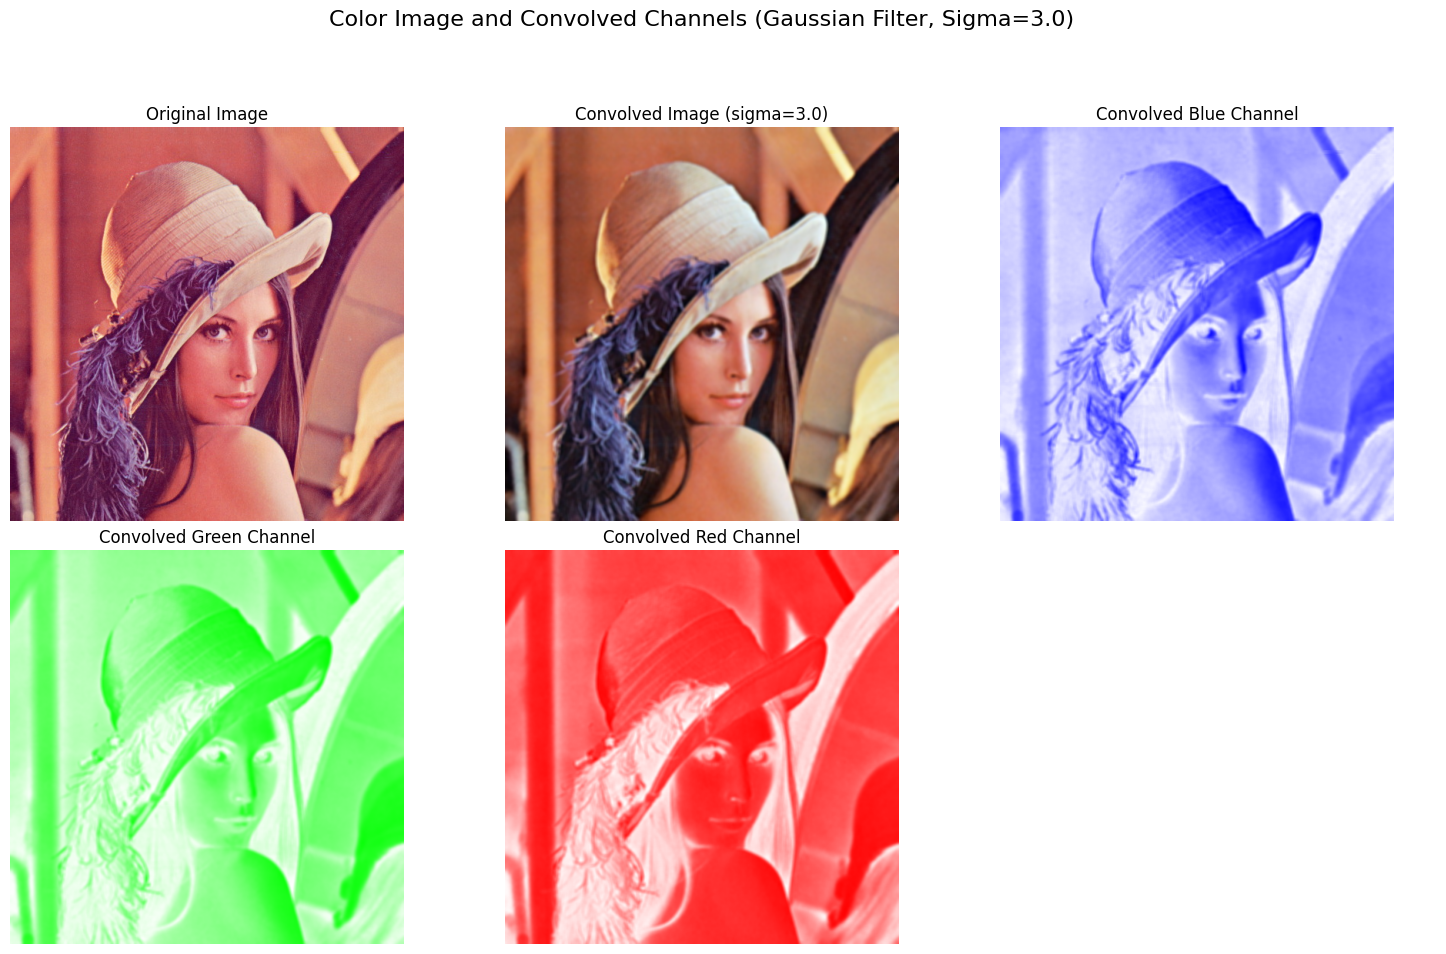

In [3]:
 # Convert BGR to RGB for Matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
convolved_image_rgb = cv2.cvtColor(convolved_image, cv2.COLOR_BGR2RGB)
temp_blue_rgb = cv2.cvtColor(temp_blue, cv2.COLOR_BGR2RGB)
temp_green_rgb = cv2.cvtColor(temp_green, cv2.COLOR_BGR2RGB)
temp_red_rgb = cv2.cvtColor(temp_red, cv2.COLOR_BGR2RGB)
    
    # Display images using Matplotlib
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns
axes = axes.ravel()  # Flatten for easier indexing
    
    # Original and convolved images
axes[0].imshow(image_rgb)
axes[0].set_title('Original Image', fontsize=12)
axes[0].axis('off')
axes[1].imshow(convolved_image_rgb)
axes[1].set_title(f'Convolved Image (sigma={sigma_value})', fontsize=12)
axes[1].axis('off')
    
    # Convolved channel images
axes[2].imshow(temp_blue_rgb)
axes[2].set_title('Convolved Blue Channel', fontsize=12)
axes[2].axis('off')
axes[3].imshow(temp_green_rgb)
axes[3].set_title('Convolved Green Channel', fontsize=12)
axes[3].axis('off')
axes[4].imshow(temp_red_rgb)
axes[4].set_title('Convolved Red Channel', fontsize=12)
axes[4].axis('off')
    
    # Leave the last subplot empty or use it for something else if needed
axes[5].axis('off')  # Hide unused subplot
    
plt.suptitle(f'Color Image and Convolved Channels (Gaussian Filter, Sigma={sigma_value})', fontsize=16, y=0.95)
plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()